HW_5 by 21600055 김동규

exercise 2,7

1. Objective: exercise 2: Visualize the graph considering location, exercise 7: draw each company's 3ma, 5ma price, volume average

2. Input: data_set_train.xlsx, stockprice_3.xlsx

3. Output: exercise 2: graph of loaction, exercise 7: 3 figure, each figure has 2 sub plot one is price another is volume

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_excel("data_set_train.xlsx") # read excel file

In [57]:
df

,aptnm(아파트 이름),yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,...,dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Heater(난방 시스템),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
0,강남역우정에쉐르,2006Q1,9000.0,2004.0,역삼동,17.23,7.0,37.494204,127.043545,225613.0,...,849.353653,0.0,52.0,1.0,0.75,개별난방,536.0,58.0,13.0,12.0
1,강남역우정에쉐르,2006Q1,9000.0,2004.0,역삼동,17.23,7.0,37.494204,127.043545,225613.0,...,849.353653,0.0,52.0,1.0,0.75,개별난방,536.0,58.0,13.0,12.0
2,개포주공1단지,2006Q1,73000.0,1982.0,개포동,50.38,3.0,37.478407,127.061375,225613.0,...,1486.178329,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0
3,개포주공1단지,2006Q1,70000.0,1982.0,개포동,50.64,5.0,37.484609,127.067275,225613.0,...,1160.598717,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0
4,개포주공1단지,2006Q1,40000.0,1982.0,개포동,35.44,4.0,37.482445,127.051278,225613.0,...,650.325555,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,현대빌라트,2017Q3,179000.0,1998.0,청담동,169.63,8.0,37.526956,127.053126,446835.0,...,874.719438,0.0,14.0,1.0,1.85,개별난방,221.0,37.0,7.0,7.0
17396,현대이스트빌,2017Q3,122500.0,1999.0,역삼동,244.14,4.0,37.496260,127.046404,446835.0,...,944.717800,0.0,12.0,1.0,2.16,개별난방,239.0,46.0,6.0,6.0
17397,현대하이츠,2017Q3,64000.0,2004.0,역삼동,96.21,1.0,37.491379,127.034880,446835.0,...,812.764336,0.0,12.0,1.0,1.25,개별난방,287.0,58.0,7.0,6.0
17398,현대한강,2017Q3,170000.0,1992.0,청담동,136.26,8.0,37.524675,127.056226,446835.0,...,717.729425,0.0,18.0,1.0,-,개별난방,290.0,NaN,10.0,10.0


In [58]:
df.columns

Index(['aptnm(아파트 이름)', 'yyyyqrt(거래년도 분기별)', 'price(가격)', 'con_year(건축년도)',
       'dong(동)', 'area(면적)', 'floor(층수)', 'Latitude(위도)', 'Longtitude(경도)',
       'gdp', 'e_grwth(경제성장률)', 'Seoul_l.rate(지가상승률)', 'house_rate(담보대출금리)',
       'dis_park(국립 공원과의 거리)', 'dis_highschool(고등학교와의 거리)',
       'dis_reconst(재개발 지역과의 거리)', 'dis_univ(대학과의 거리)',
       'dis_hospital(종합 병원과의 거리)', 'dis_museum(국립 박물관과의 거리)',
       'dis_subway(지하철역과의 거리)', 'brand_r(유명 아파트 브랜드순)', 'n_home(세대수)',
       'n_dong(동수)', 'parking_per(세대별 주차장수)', 'Heater(난방 시스템)', 'Yongpae(용적률)',
       'Gunpae(건폐율)', 'Highest(최고층)', 'Lowest(최저층)'],
      dtype='object')

In [59]:
df.describe()

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_hospital(종합 병원과의 거리),dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
count,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,...,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,17400.000000,16137.000000,15771.000000,17400.000000,17400.000000
mean,80334.523736,1992.928563,71.217003,7.451322,37.494002,127.060032,330970.131494,3.659925,0.064492,6.054785,...,1063.010719,985.858326,677.704437,1.147816,1724.199713,30.414713,251.880771,24.703887,13.693218,11.013908
std,45557.247993,10.250319,34.905756,5.627460,0.012002,0.017059,62803.867282,1.806509,0.322120,0.607412,...,523.568572,374.407888,394.313279,3.256703,1852.886244,42.795932,209.698580,15.030962,7.558171,5.629246
min,1000.000000,1978.000000,16.780000,-1.000000,37.460256,127.018178,225613.000000,-1.900000,-2.642750,5.263300,...,41.632692,87.490136,47.486971,0.000000,9.000000,1.000000,72.000000,12.000000,4.000000,3.000000
25%,53500.000000,1982.000000,42.550000,3.000000,37.484704,127.048360,277832.000000,2.700000,0.001632,5.499746,...,635.176776,693.430670,318.596967,0.000000,206.000000,2.000000,80.000000,16.000000,5.000000,5.000000
50%,74500.000000,1993.000000,59.950000,5.000000,37.493391,127.058356,335960.000000,3.500000,0.016252,5.883320,...,975.124492,1032.477721,579.455311,0.000000,900.000000,8.000000,223.000000,19.000000,14.000000,12.000000
75%,96000.000000,2004.000000,84.910000,11.000000,37.499314,127.071381,385702.000000,4.900000,0.099044,6.576878,...,1459.461217,1220.076628,899.616370,0.000000,2840.000000,34.000000,285.000000,26.000000,21.000000,15.000000
max,570000.000000,2014.000000,273.830000,45.000000,37.533197,127.103555,446835.000000,7.400000,0.624673,7.415442,...,3470.829811,3323.864542,2559.068365,15.000000,5040.000000,124.000000,2435.000000,204.000000,46.000000,26.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17400 entries, 0 to 17399
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   aptnm(아파트 이름)              17400 non-null  object 
 1   yyyyqrt(거래년도 분기별)          17400 non-null  object 
 2   price(가격)                  17400 non-null  float64
 3   con_year(건축년도)             17400 non-null  float64
 4   dong(동)                    17400 non-null  object 
 5   area(면적)                   17400 non-null  float64
 6   floor(층수)                  17400 non-null  float64
 7   Latitude(위도)               17400 non-null  float64
 8   Longtitude(경도)             17400 non-null  float64
 9   gdp                        17400 non-null  float64
 10  e_grwth(경제성장률)             17400 non-null  float64
 11  Seoul_l.rate(지가상승률)        17400 non-null  float64
 12  house_rate(담보대출금리)         17400 non-null  float64
 13  dis_park(국립 공원과의 거리)       17400 non-null  flo

In [61]:
df[df["Yongpae(용적률)"].isnull()].head()

,aptnm(아파트 이름),yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,...,dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Heater(난방 시스템),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층)
399,개포주공6단지,2006Q1,77100.0,1983.0,개포동,73.02,10.0,37.478407,127.061375,225613.0,...,1486.178329,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0
400,개포주공6단지,2006Q1,60600.0,1983.0,개포동,60.13,14.0,37.494581,127.075275,225613.0,...,316.902800,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0
401,개포주공6단지,2006Q1,49000.0,1983.0,개포동,53.06,13.0,37.484335,127.071381,225613.0,...,1155.513971,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0
402,개포주공6단지,2006Q1,59400.0,1983.0,개포동,60.13,2.0,37.484609,127.067275,225613.0,...,1160.598717,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0
403,개포주공6단지,2006Q1,59500.0,1983.0,개포동,60.13,14.0,37.478407,127.061375,225613.0,...,1486.178329,0.0,1060.0,9.0,0.28,중앙난방,NaN,NaN,15.0,13.0


In [62]:
df["Yongpae(용적률)"]

0        536.0
1        536.0
2         72.0
3         72.0
4         72.0
         ...  
17395    221.0
17396    239.0
17397    287.0
17398    290.0
17399    290.0
Name: Yongpae(용적률), Length: 17400, dtype: float64

In [63]:
df["Yonapae(용적률)"] = df["Yongpae(용적률)"].replace(np.nan,df["Yongpae(용적률)"].mean()) # replace null value to average
df["Gunpae(건폐율)"] = df["Gunpae(건폐율)"].replace(np.nan,df["Gunpae(건폐율)"].mean())

In [64]:
df["dong(동)"].value_counts() # counts per each dong

개포동     5866
역삼동     3729
대치동     2411
수서동     1937
도곡동     1032
청담동      868
논현동      636
삼성동      569
일원동      333
세곡동       17
압구정동       2
Name: dong(동), dtype: int64

In [65]:
df['yyyyqrt(거래년도 분기별)'].value_counts() # counts per year and quarter

2017Q1    780
2006Q1    703
2006Q3    682
2006Q4    670
2006Q2    562
2017Q2    537
2016Q3    419
2008Q2    416
2012Q4    416
2015Q2    405
2011Q3    397
2016Q1    389
2007Q4    386
2008Q1    385
2015Q3    373
2015Q1    370
2016Q2    369
2011Q4    367
2011Q1    357
2011Q2    353
2010Q1    353
2017Q3    352
2007Q2    349
2015Q4    348
2013Q3    343
2014Q4    336
2013Q2    334
2009Q1    325
2013Q1    325
2013Q4    323
2014Q1    317
2007Q3    315
2010Q4    313
2010Q3    310
2016Q4    306
2014Q3    304
2009Q2    303
2014Q2    298
2009Q3    295
2009Q4    280
2012Q2    277
2007Q1    270
2010Q2    241
2012Q1    238
2008Q3    219
2012Q3    204
2008Q4    186
Name: yyyyqrt(거래년도 분기별), dtype: int64

In [66]:
data1 = df.loc[:,"yyyyqrt(거래년도 분기별)":"Longtitude(경도)"]
data1.head()

,yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도)
0,2006Q1,9000.0,2004.0,역삼동,17.23,7.0,37.494204,127.043545
1,2006Q1,9000.0,2004.0,역삼동,17.23,7.0,37.494204,127.043545
2,2006Q1,73000.0,1982.0,개포동,50.38,3.0,37.478407,127.061375
3,2006Q1,70000.0,1982.0,개포동,50.64,5.0,37.484609,127.067275
4,2006Q1,40000.0,1982.0,개포동,35.44,4.0,37.482445,127.051278


In [67]:
data1 = df[["yyyyqrt(거래년도 분기별)","price(가격)","dong(동)","Latitude(위도)","Longtitude(경도)","Seoul_l.rate(지가상승률)",
           "dis_subway(지하철역과의 거리)"]] # remake dataframe
data1.head()

,yyyyqrt(거래년도 분기별),price(가격),dong(동),Latitude(위도),Longtitude(경도),Seoul_l.rate(지가상승률),dis_subway(지하철역과의 거리)
0,2006Q1,9000.0,역삼동,37.494204,127.043545,0.152881,849.353653
1,2006Q1,9000.0,역삼동,37.494204,127.043545,0.152881,849.353653
2,2006Q1,73000.0,개포동,37.478407,127.061375,0.152881,1486.178329
3,2006Q1,70000.0,개포동,37.484609,127.067275,0.152881,1160.598717
4,2006Q1,40000.0,개포동,37.482445,127.051278,0.152881,650.325555


In [68]:
dong = ["Chungdam","Apgujeong","Dogok","SamSung","Daechi","Gaepo","Yeoksam","Suseo"] # dong name data
lon = [127.0497,127.0303,127.0438,127.0565,127.0611,127.0609,127.0374,127.1052] # longitude dong data
lat = [37.5232,37.5317,37.4898,37.5140,37.4995,37.4790,37.4999,37.4890] # latitude dong data
data = {"Dong":dong, "Lat":lat, "Lng": lon}
dong_data = pd.DataFrame(data=data)
dong_data

,Dong,Lat,Lng
0,Chungdam,37.5232,127.0497
1,Apgujeong,37.5317,127.0303
2,Dogok,37.4898,127.0438
3,SamSung,37.5140,127.0565
4,Daechi,37.4995,127.0611
5,Gaepo,37.4790,127.0609
6,Yeoksam,37.4999,127.0374
7,Suseo,37.4890,127.1052


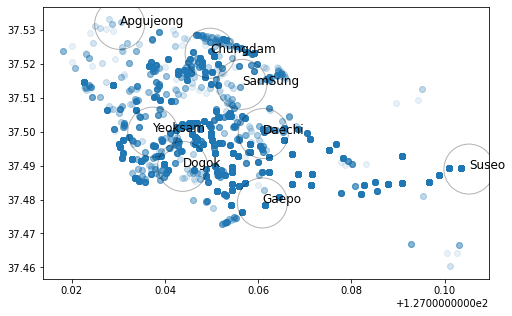

In [69]:
# exercise 2
plt.figure(figsize=(8, 5)) 
plt.scatter(data1['Longtitude(경도)'],data1['Latitude(위도)'],alpha=0.1) # draw location graph of each apt
for i in range(8): # write text each dong name
    plt.text(dong_data["Lng"][i],dong_data["Lat"][i],dong_data["Dong"][i],fontsize=12)
plt.scatter(dong_data["Lng"],dong_data["Lat"],edgecolors="black",c="None",s=2500,alpha=0.3)# draw each dong circle

In [70]:
data2 = data1.copy()
data2.columns = ["yearqrt","price","dong","Lat","Lng","rate","station_dist"]
data2

,yearqrt,price,dong,Lat,Lng,rate,station_dist
0,2006Q1,9000.0,역삼동,37.494204,127.043545,0.152881,849.353653
1,2006Q1,9000.0,역삼동,37.494204,127.043545,0.152881,849.353653
2,2006Q1,73000.0,개포동,37.478407,127.061375,0.152881,1486.178329
3,2006Q1,70000.0,개포동,37.484609,127.067275,0.152881,1160.598717
4,2006Q1,40000.0,개포동,37.482445,127.051278,0.152881,650.325555
...,...,...,...,...,...,...,...
17395,2017Q3,179000.0,청담동,37.526956,127.053126,0.069818,874.719438
17396,2017Q3,122500.0,역삼동,37.496260,127.046404,0.069818,944.717800
17397,2017Q3,64000.0,역삼동,37.491379,127.034880,0.069818,812.764336
17398,2017Q3,170000.0,청담동,37.524675,127.056226,0.069818,717.729425


Text(0, 0.5, 'Latitude')

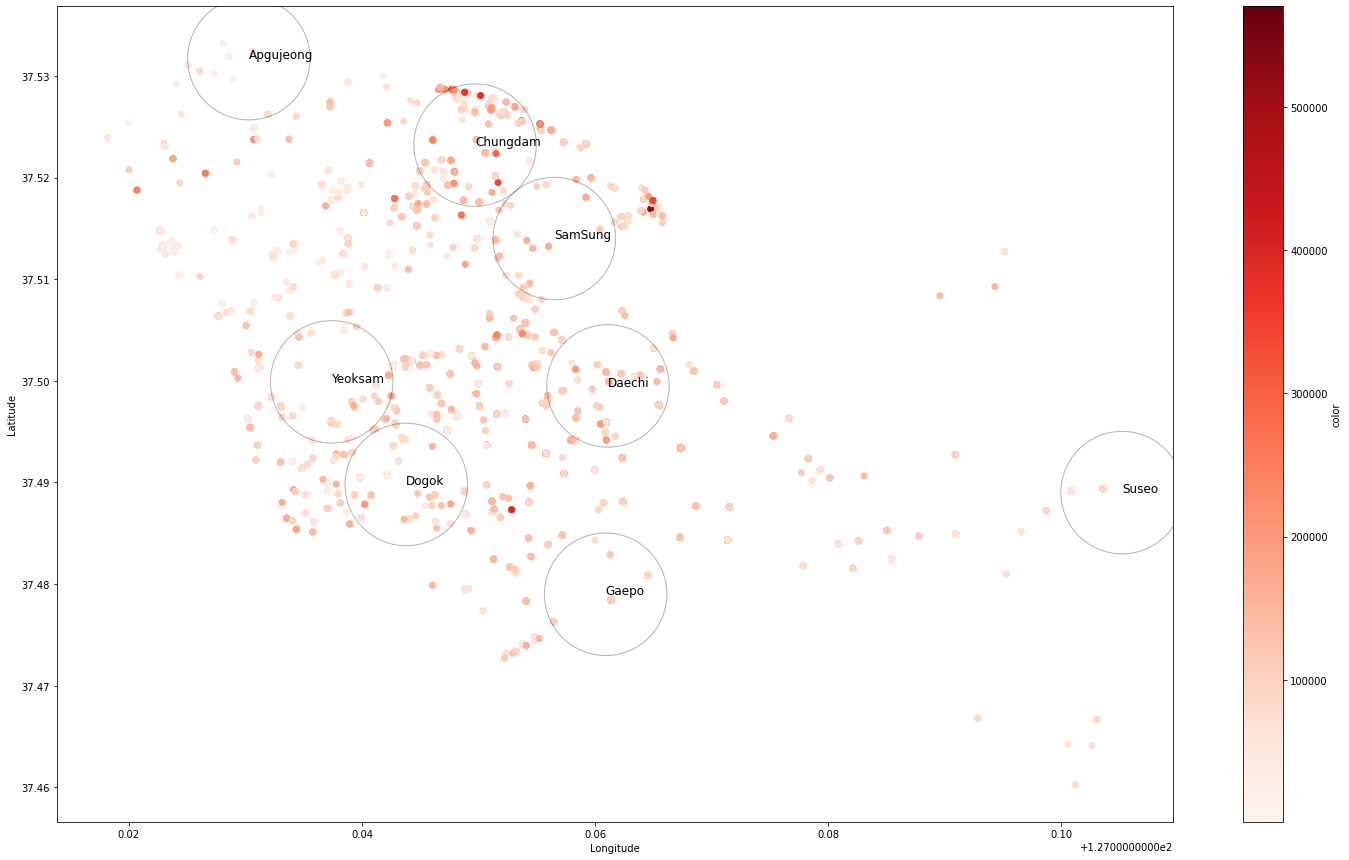

In [71]:
plt.figure(figsize = (25,15))
plt.scatter(x=data2["Lng"],y=data2["Lat"],c=data2["price"],cmap=plt.cm.Reds) # mark price with color red
plt.colorbar(label="color")
for i in range(8):
    plt.text(dong_data["Lng"][i],dong_data["Lat"][i],dong_data["Dong"][i],fontsize=12)
    
plt.scatter(dong_data["Lng"],dong_data["Lat"],edgecolors="black",c="None",s=15000,alpha=0.3) # draw each dong's circle
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Text(0, 0.5, 'Latitude')

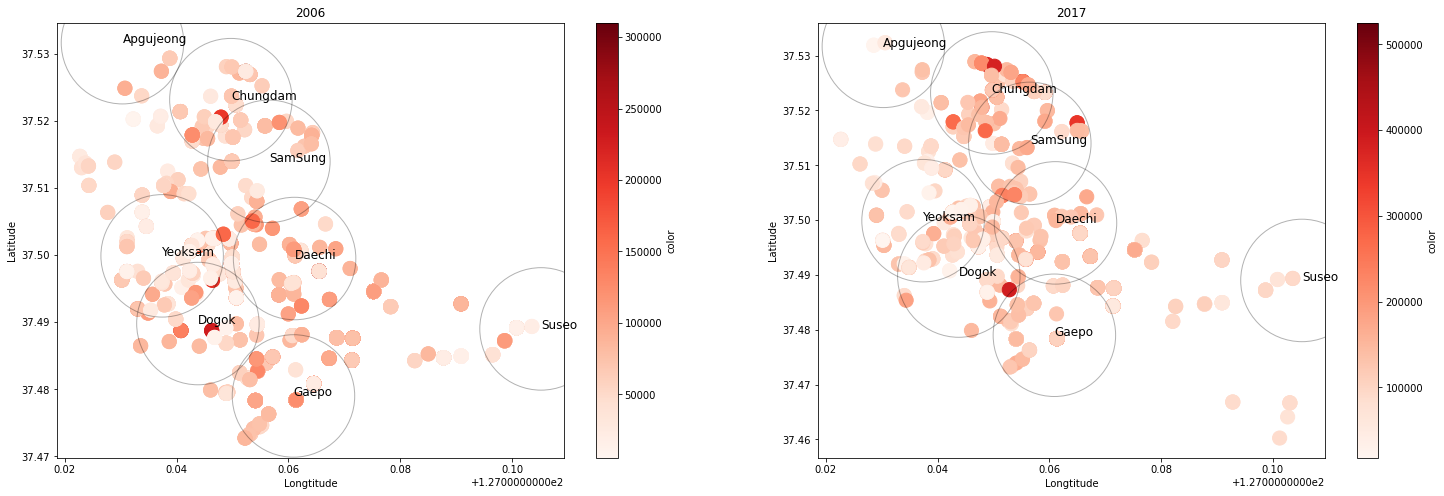

In [72]:
plt.figure(figsize = (25,8))

tp = data2[data2['yearqrt'].str.contains("2006Q")] # lat and long with each dong's price in 2006
plt.subplot(1,2,1)
plt.scatter(x=tp["Lng"],y=tp["Lat"],c=tp["price"],s=200,cmap=plt.cm.Reds)
plt.colorbar(label="color")
for i in range(8):
    plt.text(dong_data["Lng"][i],dong_data["Lat"][i],dong_data["Dong"][i],fontsize=12)
plt.scatter(dong_data["Lng"],dong_data["Lat"],edgecolors="black",c="None",s=15000,alpha=0.3)
plt.title("2006")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")

tp = data2[data2['yearqrt'].str.contains("2017Q")]# lat and long with each dong's price in 2017
plt.subplot(1,2,2)
plt.scatter(x=tp["Lng"],y=tp["Lat"],c=tp["price"],s=200,cmap=plt.cm.Reds)
plt.colorbar(label="color")
for i in range(8):
    plt.text(dong_data["Lng"][i],dong_data["Lat"][i],dong_data["Dong"][i],fontsize=12)
plt.scatter(dong_data["Lng"],dong_data["Lat"],edgecolors="black",c="None",s=15000,alpha=0.3)
plt.title("2017")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")

In [73]:
data_gaepo = data2[data2["dong"]=="개포동"]
data_gaepo.head()

,yearqrt,price,dong,Lat,Lng,rate,station_dist
2,2006Q1,73000.0,개포동,37.478407,127.061375,0.152881,1486.178329
3,2006Q1,70000.0,개포동,37.484609,127.067275,0.152881,1160.598717
4,2006Q1,40000.0,개포동,37.482445,127.051278,0.152881,650.325555
5,2006Q1,56000.0,개포동,37.478407,127.061375,0.152881,1486.178329
6,2006Q1,40500.0,개포동,37.494581,127.075275,0.152881,316.902800


In [74]:
data_gaepo_time = data_gaepo.groupby("yearqrt").mean()
data_gaepo_time

,price,Lat,Lng,rate,station_dist
yearqrt,,,,,
2006Q1,66954.968288,37.483163,127.063829,0.152881,1106.719865
2006Q2,69240.408163,37.484935,127.066870,0.430146,1009.206136
2006Q3,71064.128440,37.484071,127.063688,0.367231,1060.919660
2006Q4,86538.140704,37.484502,127.065871,0.624673,1033.040965
2007Q1,79064.285714,37.487090,127.068583,0.100708,846.666678
2007Q2,79900.581395,37.484986,127.065834,0.041493,1061.339749
2007Q3,83373.809524,37.487327,127.068551,0.082893,824.821010
2007Q4,79498.275862,37.485786,127.066398,0.218588,971.971004
2008Q1,85955.714286,37.485744,127.066507,0.209861,962.489877


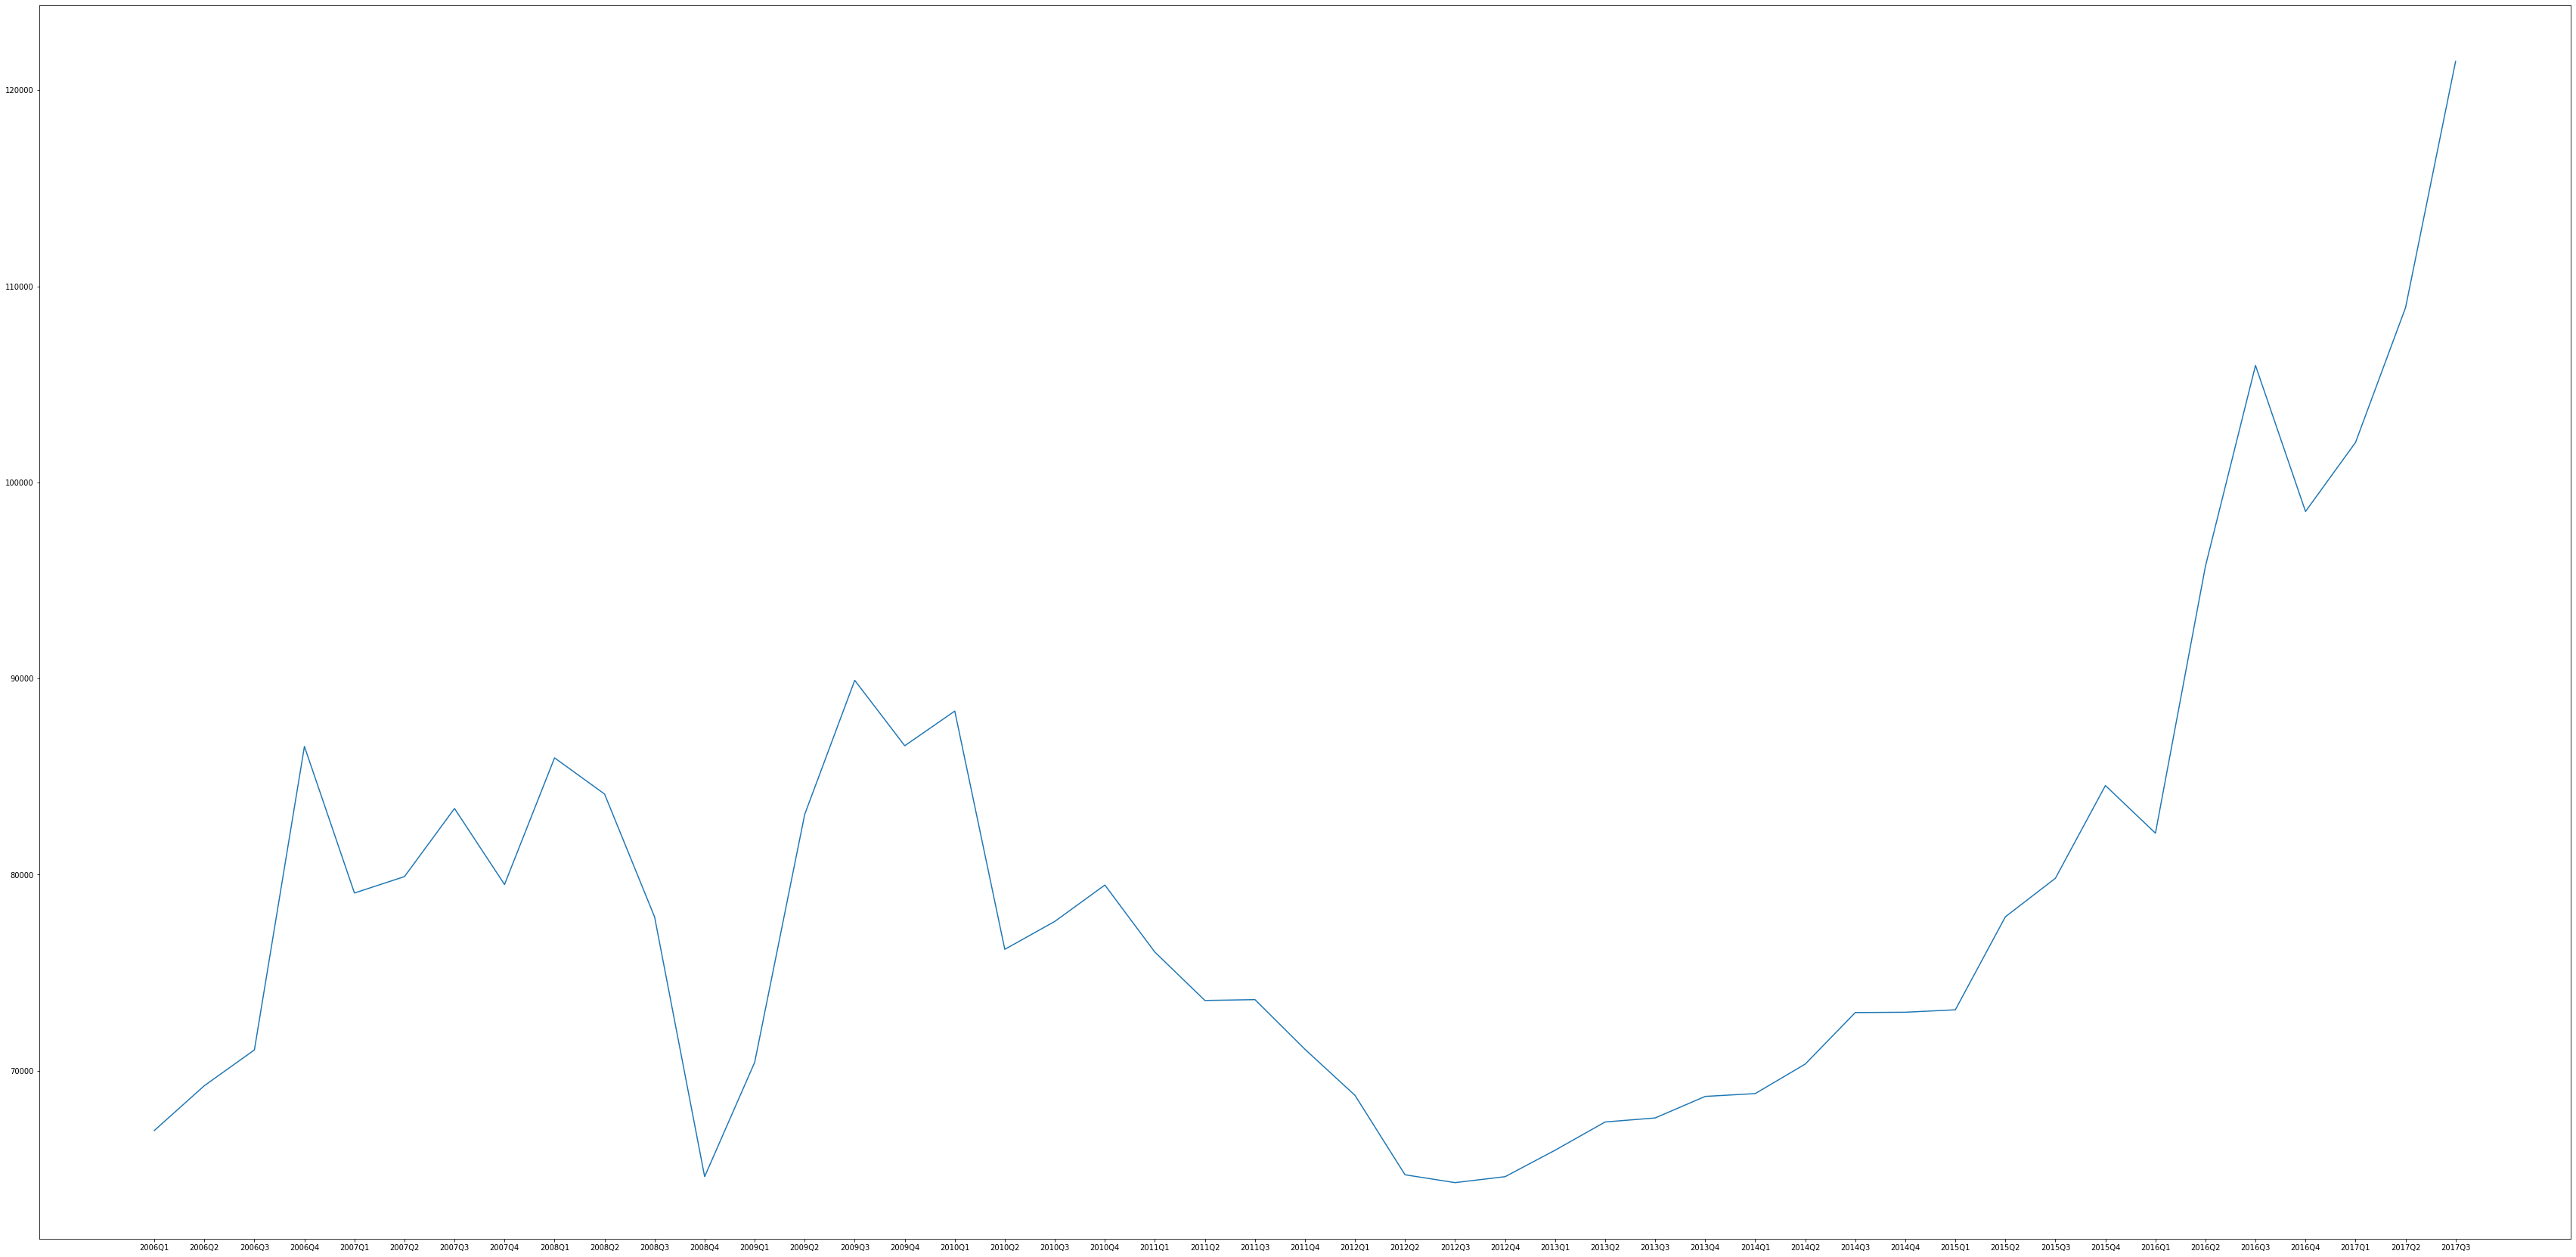

In [75]:
plt.figure(figsize=(60,30))
plt.plot(data_gaepo_time["price"]) # gaepo dong's apt time serise graph

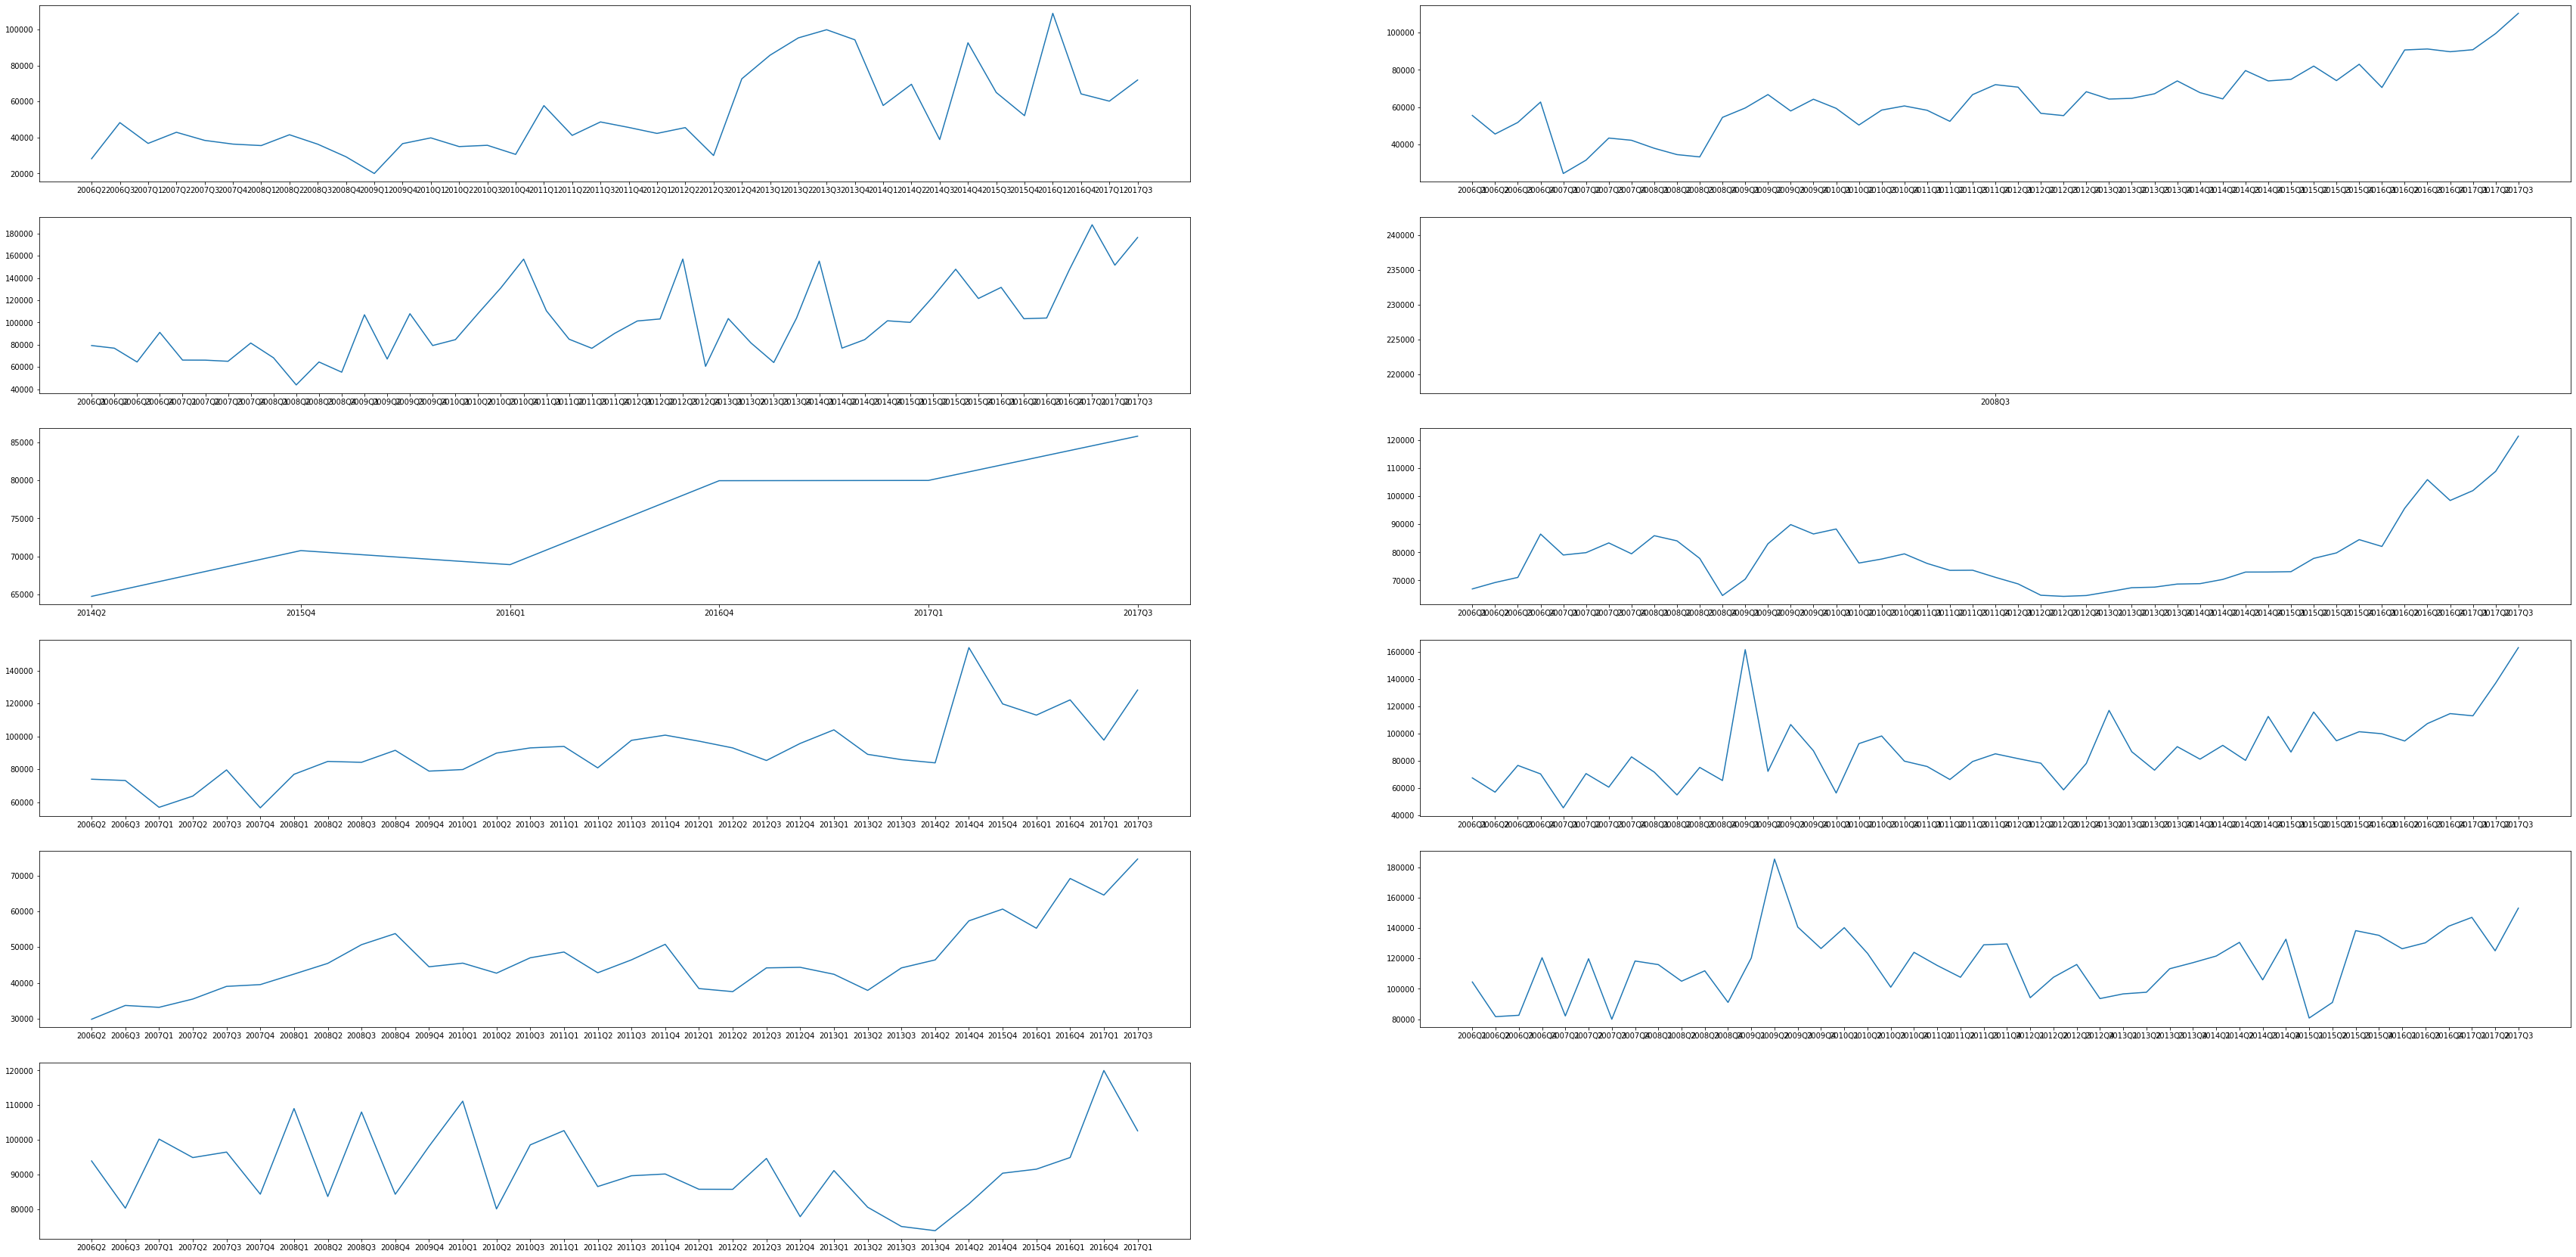

In [76]:
#exercise3
d_list = list(set(data2["dong"])) # each dong's apt price graph
plt.figure(figsize=(60,30))
for i in range(len(d_list)):
    plt.subplot(6,2,i+1)
    data_dong = data2[data2["dong"]==d_list[i]]
    data_dong_time = data_dong.groupby("yearqrt").mean()
    plt.plot(data_dong_time["price"])

In [77]:
for i in d_list: # print each row count
    tmp=df[df['dong(동)']==i]
    tp=tmp.groupby('yyyyqrt(거래년도 분기별)').mean()
    print(i, ' : ', len(tp), end=' ')
    print('\n')

논현동  :  38 

역삼동  :  47 

청담동  :  47 

압구정동  :  1 

세곡동  :  6 

개포동  :  47 

도곡동  :  32 

삼성동  :  47 

수서동  :  32 

대치동  :  46 

일원동  :  32 



<Figure size 3600x7200 with 0 Axes>

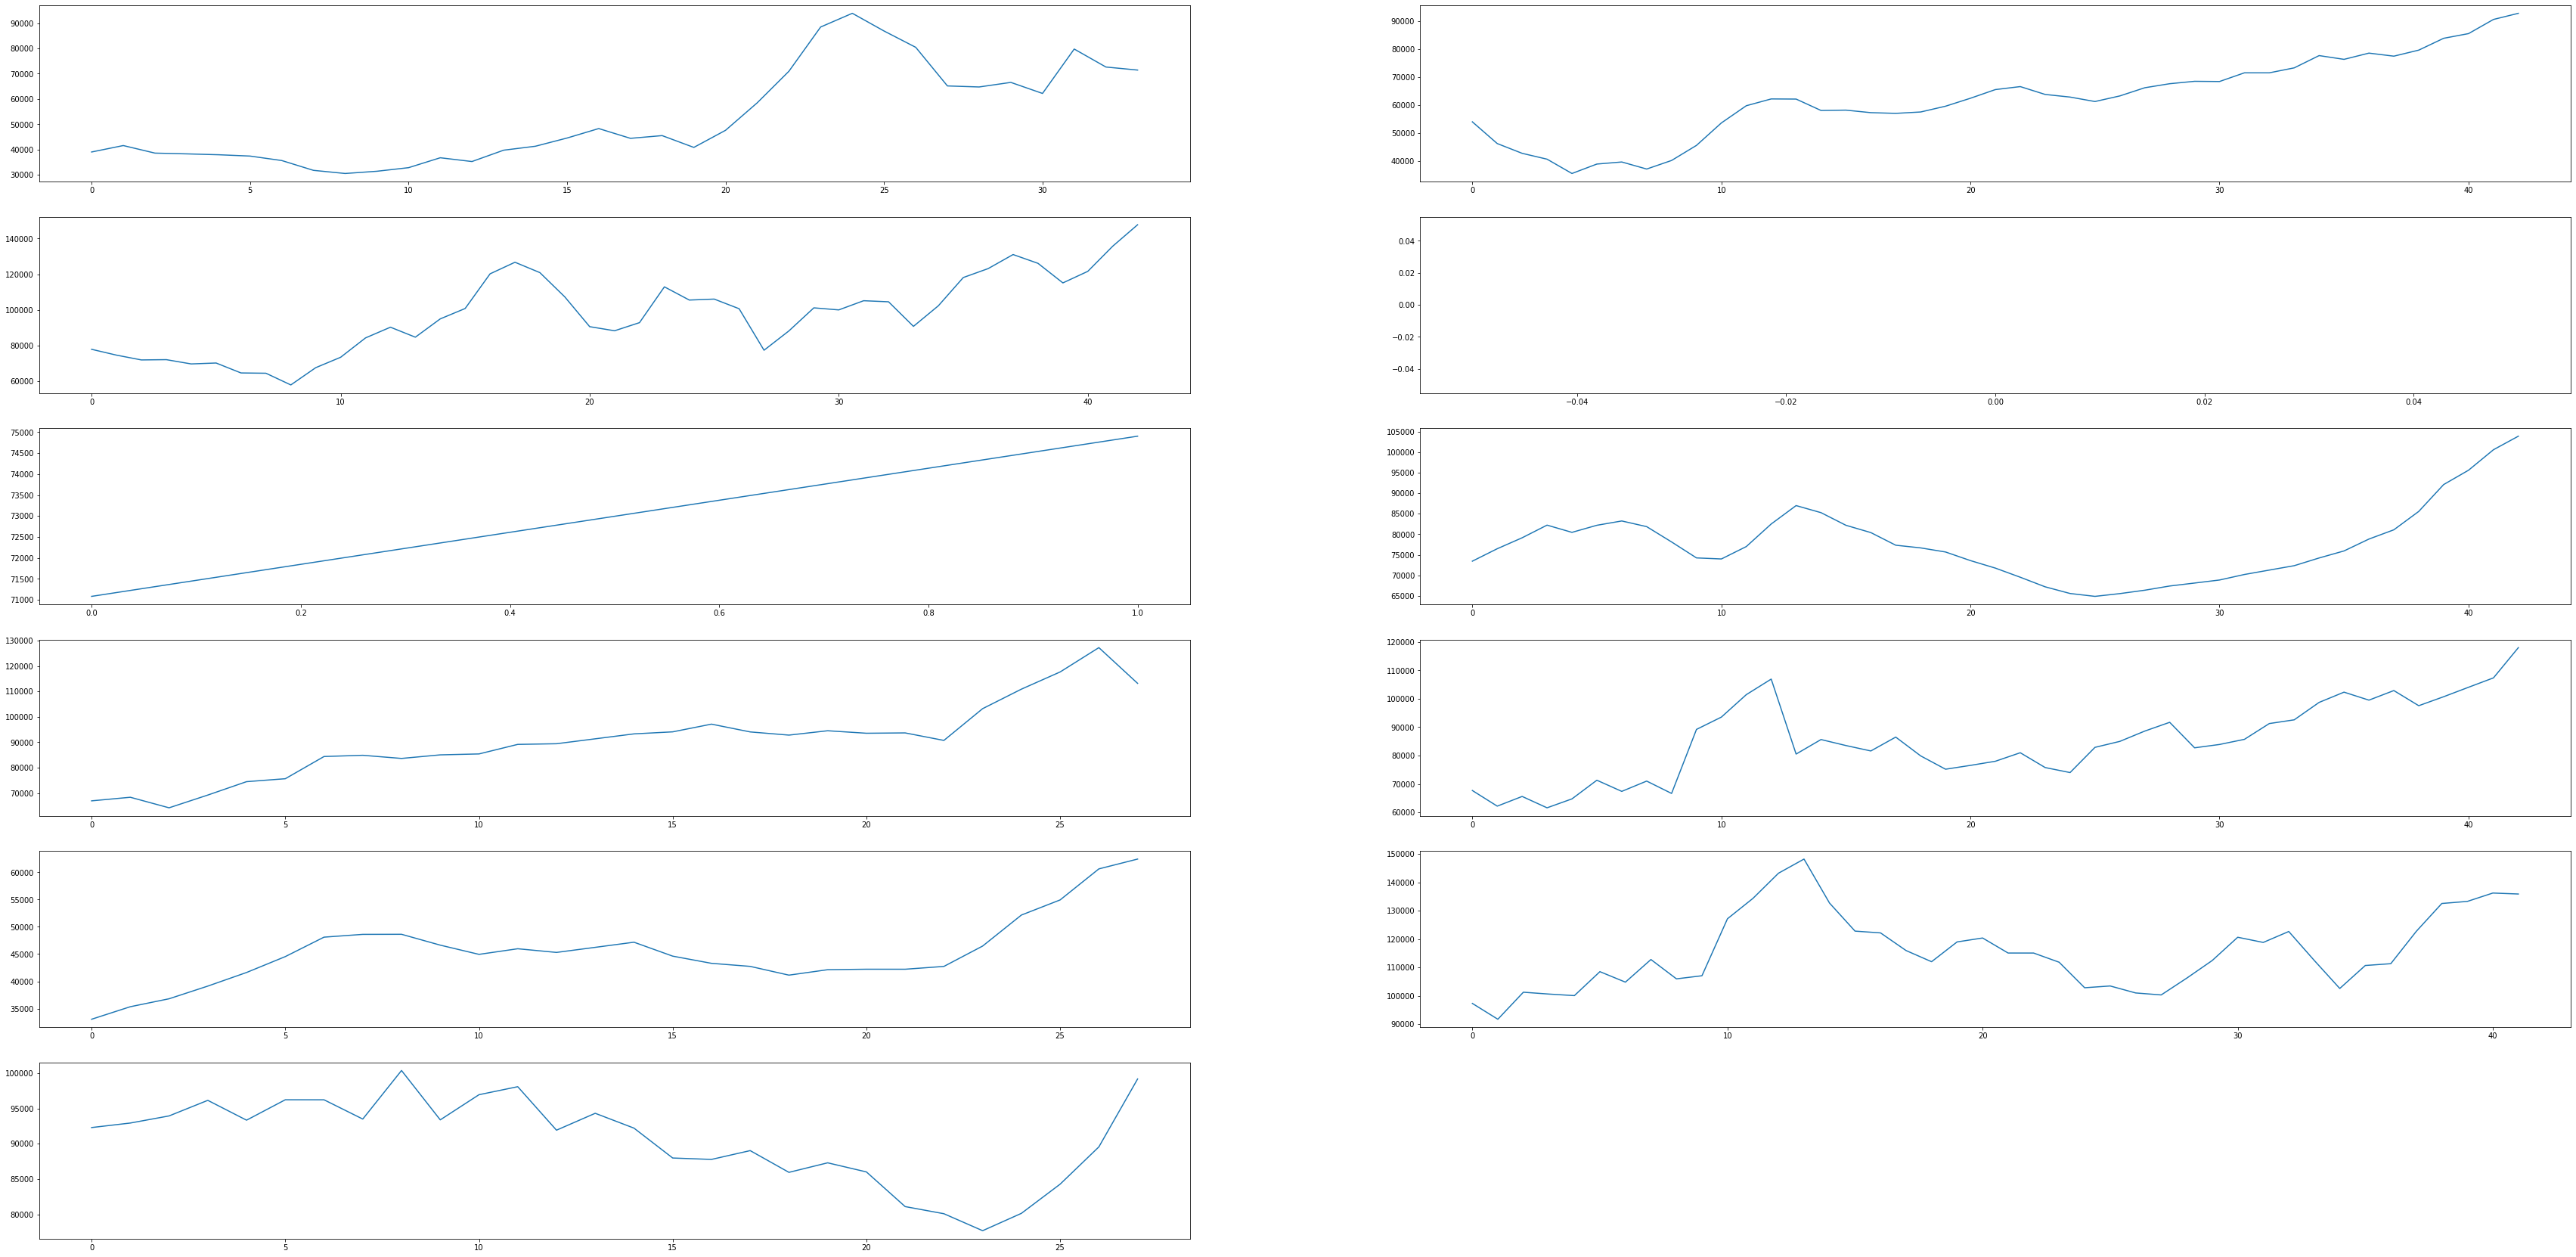

In [78]:
#exercise 4
plt.figure(figsize=(50,100))
count=1; date=[];
nMA = 2 # number of Pre(or post) samples to average
plt.figure(figsize = (60,30))
for i in d_list:
    
    tmp=df[df['dong(동)']==i]
    tp=tmp.groupby('yyyyqrt(거래년도 분기별)').mean()
    ls=[]
    for j in range(nMA,len(tp)-nMA): # Averaging 5 samples
        ls.append(tp['price(가격)'].iloc[j-nMA:j+nMA].mean())
    
    plt.subplot(6,2,count)
    plt.plot(ls)
    count=count+1

In [79]:
df2006q1 = df[df["yyyyqrt(거래년도 분기별)"]=="2006Q1"]
df2006q1.head(13)

,aptnm(아파트 이름),yyyyqrt(거래년도 분기별),price(가격),con_year(건축년도),dong(동),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,...,brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),parking_per(세대별 주차장수),Heater(난방 시스템),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층),Yonapae(용적률)
0,강남역우정에쉐르,2006Q1,9000.0,2004.0,역삼동,17.23,7.0,37.494204,127.043545,225613.0,...,0.0,52.0,1.0,0.75,개별난방,536.0,58.0,13.0,12.0,536.0
1,강남역우정에쉐르,2006Q1,9000.0,2004.0,역삼동,17.23,7.0,37.494204,127.043545,225613.0,...,0.0,52.0,1.0,0.75,개별난방,536.0,58.0,13.0,12.0,536.0
2,개포주공1단지,2006Q1,73000.0,1982.0,개포동,50.38,3.0,37.478407,127.061375,225613.0,...,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0,72.0
3,개포주공1단지,2006Q1,70000.0,1982.0,개포동,50.64,5.0,37.484609,127.067275,225613.0,...,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0,72.0
4,개포주공1단지,2006Q1,40000.0,1982.0,개포동,35.44,4.0,37.482445,127.051278,225613.0,...,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0,72.0
5,개포주공1단지,2006Q1,56000.0,1982.0,개포동,42.55,5.0,37.478407,127.061375,225613.0,...,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0,72.0
6,개포주공1단지,2006Q1,40500.0,1982.0,개포동,35.87,4.0,37.494581,127.075275,225613.0,...,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0,72.0
7,개포주공1단지,2006Q1,53000.0,1982.0,개포동,42.55,4.0,37.478407,127.061375,225613.0,...,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0,72.0
8,개포주공1단지,2006Q1,56000.0,1982.0,개포동,41.98,2.0,37.487610,127.071517,225613.0,...,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0,72.0
9,개포주공1단지,2006Q1,77500.0,1982.0,개포동,50.38,3.0,37.482445,127.051278,225613.0,...,0.0,5040.0,124.0,0.49,개별난방,72.0,15.0,5.0,5.0,72.0


In [80]:
df2006q1_apt = df2006q1.groupby('aptnm(아파트 이름)').mean()
df2006q1_apt.head(13)

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층),Yonapae(용적률)
aptnm(아파트 이름),,,,,,,,,,,,,,,,,,,,,
강남역우정에쉐르,9000.000000,2004.000000,17.230000,7.000000,37.494204,127.043545,225613.0,6.3,0.152881,5.559495,...,1694.419810,849.353653,0.0,52.0,1.0,536.0,58.000000,13.0,12.0,536.000000
개포주공1단지,68966.058394,1982.000000,46.956058,3.000000,37.483186,127.063440,225613.0,6.3,0.152881,5.559495,...,885.485924,1100.127387,0.0,5040.0,124.0,72.0,15.000000,5.0,5.0,72.000000
개포주공4단지,57731.764706,1982.141176,42.510235,2.800000,37.483428,127.064881,225613.0,6.3,0.152881,5.559495,...,880.188805,1097.917447,0.0,2840.0,58.0,80.0,16.000000,5.0,5.0,80.000000
개포주공5단지,66784.210526,1983.000000,63.886316,8.631579,37.481076,127.061997,225613.0,6.3,0.152881,5.559495,...,842.399572,1253.348527,0.0,940.0,6.0,151.0,12.000000,14.0,13.0,151.000000
개포주공6단지,66066.666667,1983.000000,64.334444,7.444444,37.485030,127.068470,225613.0,6.3,0.152881,5.559495,...,802.383447,1051.509291,0.0,1060.0,9.0,NaN,24.703887,15.0,13.0,251.880771
개포주공7단지,70996.296296,1983.000000,67.244444,8.000000,37.483491,127.063689,225613.0,6.3,0.152881,5.559495,...,838.087611,1062.863117,0.0,900.0,8.0,NaN,24.703887,15.0,15.0,251.880771
공간쉐르빌,25500.000000,2003.000000,78.080000,2.000000,37.496302,127.042105,225613.0,6.3,0.152881,5.559495,...,1632.712972,690.127727,0.0,17.0,1.0,269.0,49.000000,6.0,6.0,269.000000
구산,40000.000000,1993.000000,80.580000,7.000000,37.520578,127.047927,225613.0,6.3,0.152881,5.559495,...,1146.025454,397.251479,0.0,37.0,1.0,248.0,34.000000,9.0,5.0,248.000000
금호어울림,59450.000000,2003.000000,84.950000,8.000000,37.498795,127.045058,225613.0,6.3,0.152881,5.559495,...,1288.710908,763.214287,0.0,183.0,3.0,299.0,26.000000,15.0,10.0,299.000000


In [81]:
df2006q1_apt.corr().head()

,price(가격),con_year(건축년도),area(면적),floor(층수),Latitude(위도),Longtitude(경도),gdp,e_grwth(경제성장률),Seoul_l.rate(지가상승률),house_rate(담보대출금리),...,dis_museum(국립 박물관과의 거리),dis_subway(지하철역과의 거리),brand_r(유명 아파트 브랜드순),n_home(세대수),n_dong(동수),Yongpae(용적률),Gunpae(건폐율),Highest(최고층),Lowest(최저층),Yonapae(용적률)
price(가격),1.000000,-0.134905,0.814753,0.106497,0.123592,0.258175,NaN,NaN,NaN,NaN,...,-0.155071,-0.029509,0.125414,0.168964,0.103044,-0.389314,-0.357909,0.142578,-0.153575,-0.399136
con_year(건축년도),-0.134905,1.000000,0.222922,0.226211,0.372288,-0.640149,NaN,NaN,NaN,NaN,...,0.402493,-0.521862,0.253820,-0.702862,-0.545435,0.235234,0.221605,0.230494,0.022528,0.246406
area(면적),0.814753,0.222922,1.000000,-0.002331,0.392753,-0.028654,NaN,NaN,NaN,NaN,...,0.003328,-0.274637,-0.001639,-0.254925,-0.242229,-0.300768,-0.134782,-0.022896,-0.270260,-0.293399
floor(층수),0.106497,0.226211,-0.002331,1.000000,0.071205,-0.130484,NaN,NaN,NaN,NaN,...,-0.086744,-0.155197,0.259908,-0.151798,-0.247426,0.054783,-0.253219,0.698472,0.426440,0.050460
Latitude(위도),0.123592,0.372288,0.392753,0.071205,1.000000,-0.517893,NaN,NaN,NaN,NaN,...,0.135432,-0.773430,-0.090339,-0.433412,-0.397187,0.018871,0.181324,-0.041035,-0.323170,0.067693


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site

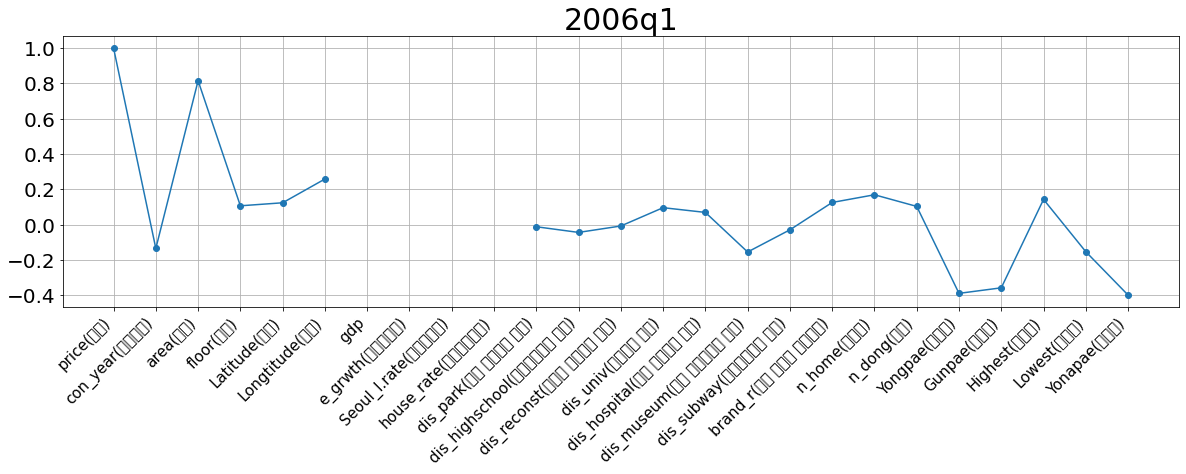

In [82]:
df2006q1 = df[df["yyyyqrt(거래년도 분기별)"]=="2006Q1"]
df2006q1_apt = df2006q1.groupby('aptnm(아파트 이름)').mean()
r = df2006q1_apt.corr()
r_price = r["price(가격)"]

plt.figure(figsize = (20,5))
plt.plot(r_price,'o-')
plt.yticks(fontsize= 20)
plt.xticks(rotation=45,fontsize=15,ha = "right")
plt.title("2006q1",fontsize=30)
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site

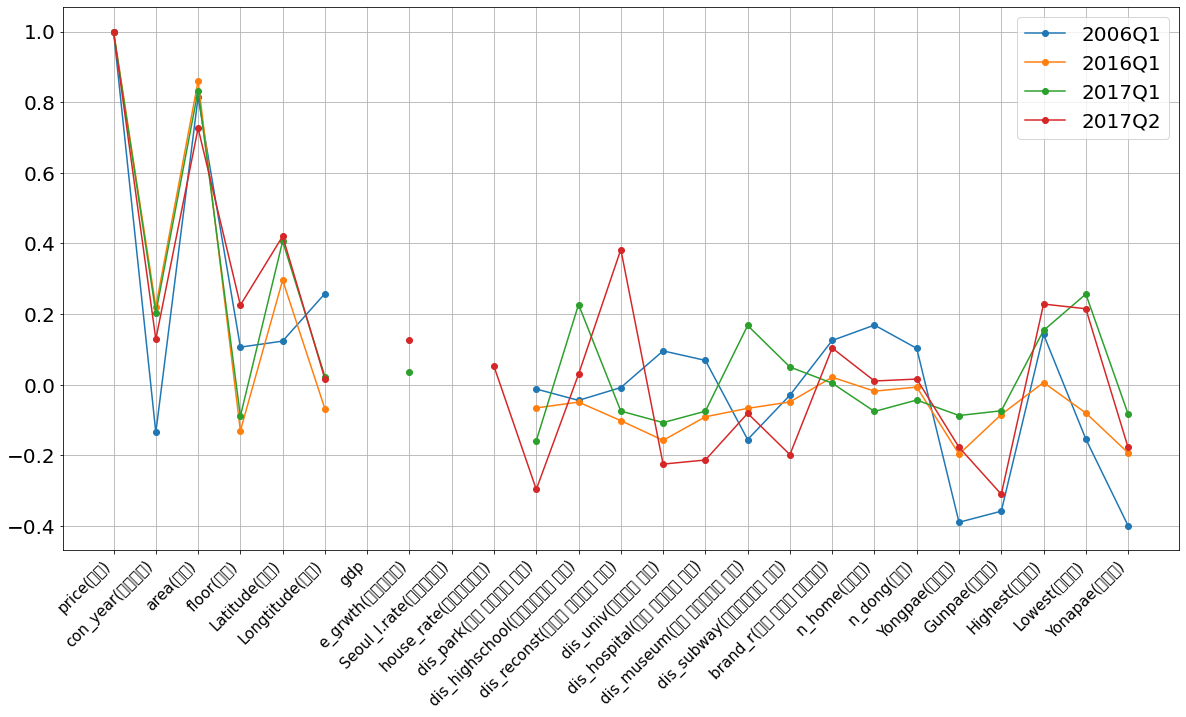

In [83]:
# exercise 5
years = ["2006Q1","2016Q1","2017Q1","2017Q2"]

for y in years:
    df_y = df[df["yyyyqrt(거래년도 분기별)"]==y]
    df_y_apt = df_y.groupby("aptnm(아파트 이름)").mean()
    df_r = df_y_apt.corr()
    df_r_price = df_r["price(가격)"]
    if y==years[0]:
        df_r_price_all = df_r_price
    else:
        df_r_price_all = pd.concat([df_r_price_all,df_r_price],axis=1)
df_r_price_all.columns = years

plt.figure(figsize = (20,10))
plt.plot(df_r_price_all,"o-")
plt.yticks(fontsize=20)
plt.xticks(rotation=45,fontsize=15,ha="right")
plt.grid(True)
plt.legend(years,fontsize=20)
plt.show()

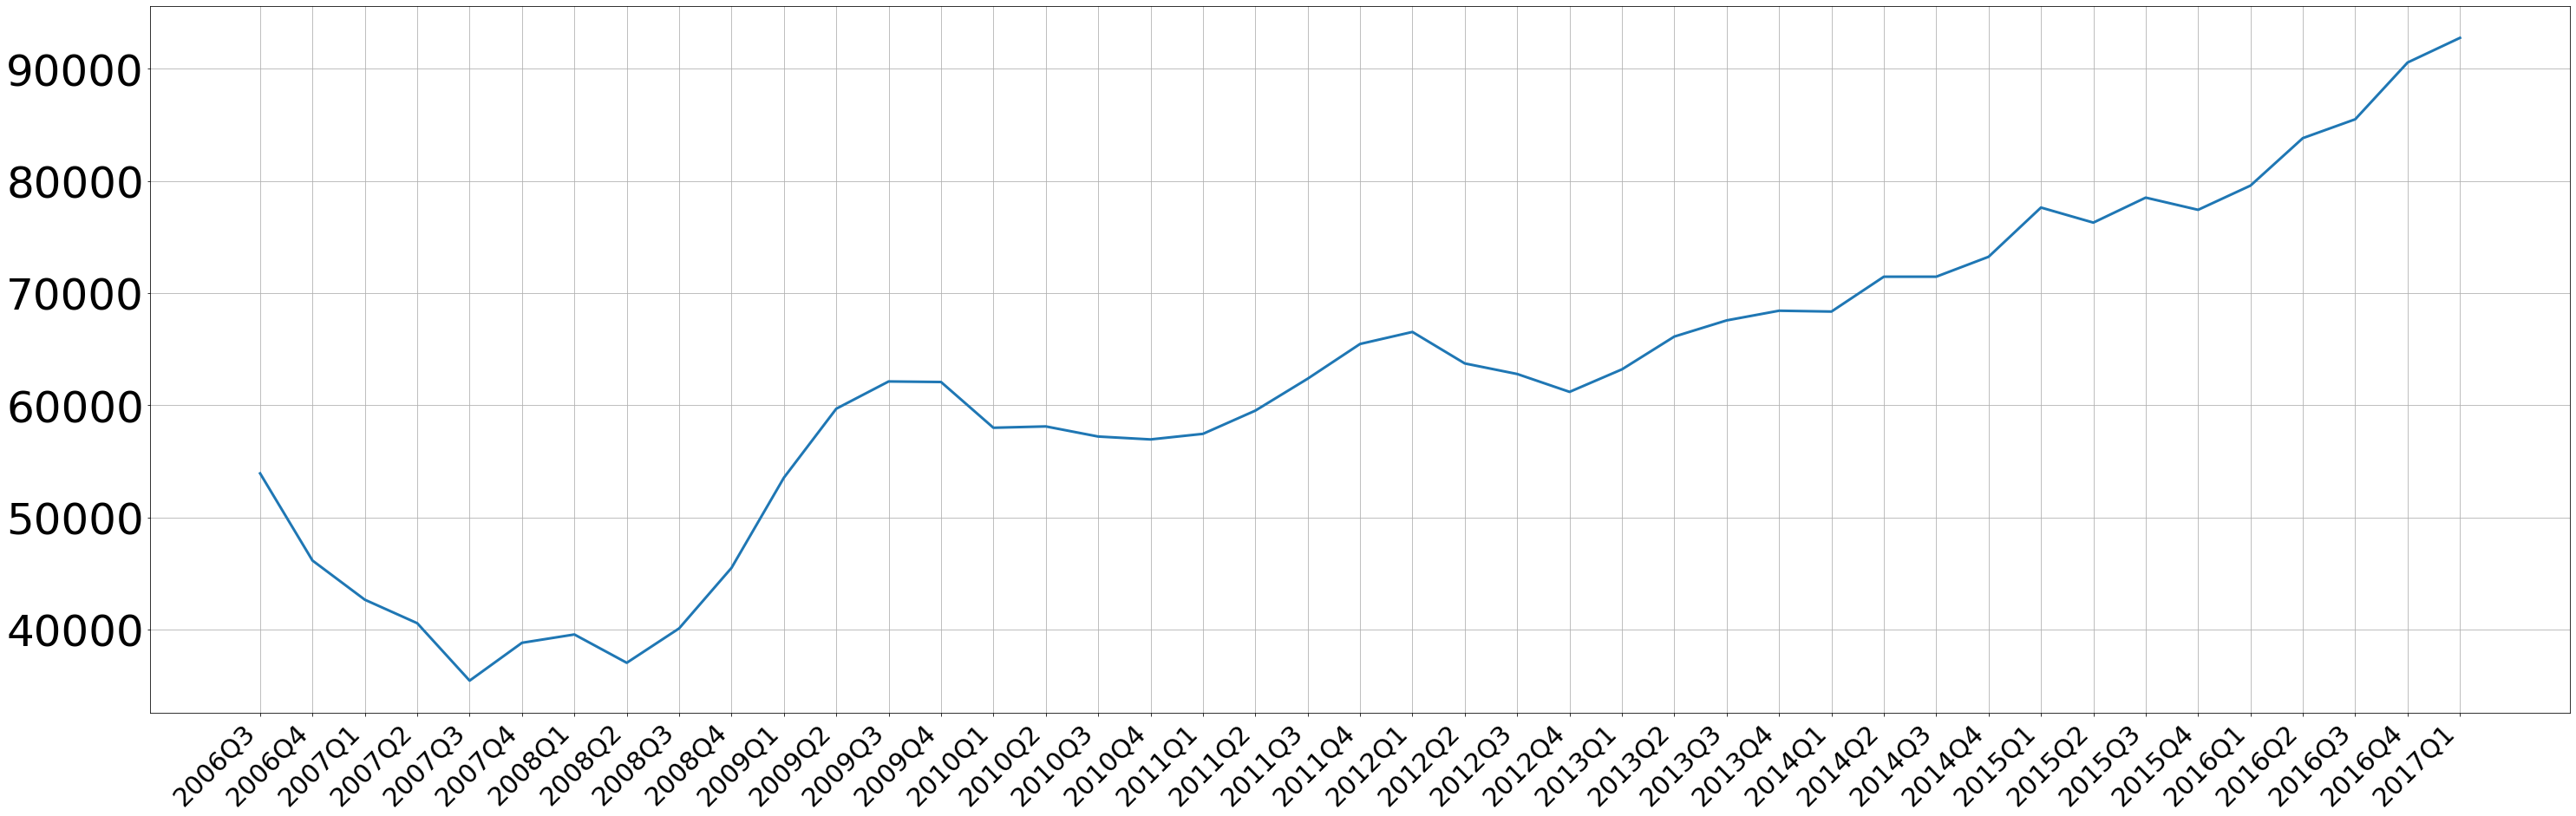

In [84]:
#exercise 6
nma = 2

plt.figure(figsize = (50,15))
tmp = df[df["dong(동)"]=="역삼동"]
tp = tmp.groupby("yyyyqrt(거래년도 분기별)").mean().copy()
ls = []
for j in range(nma,len(tp)-nma):
    ls.append(tp['price(가격)'].iloc[j-nma:j+nma].mean())
df_mean5 = pd.DataFrame({"Time":tp.index.values[nma:len(tp)-nma],"Mean_Price":ls})
plt.plot(df_mean5["Time"],df_mean5["Mean_Price"],linewidth=3.0)
plt.yticks(fontsize=50)
plt.xticks(fontsize=30,rotation=45,ha="right")
plt.grid(True)
df_mean5.set_index("Time",inplace=True)

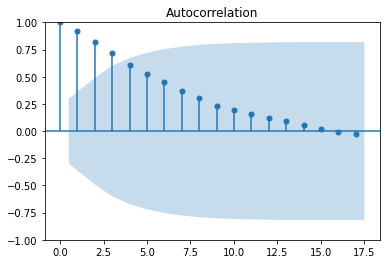

In [89]:
plot_acf(df_mean5["Mean_Price"])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


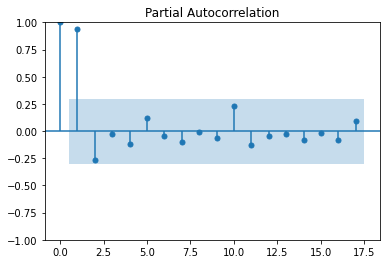

In [90]:
plot_pacf(df_mean5["Mean_Price"])
plt.show()

In [93]:
#exercise 7
stock = pd.read_excel("stockprice_3.xlsx") # read excel file
stock

,Date,Price,Volume,Code
0,20190101,38700,9900267,A005930
1,20190102,38750,7847664,A005930
2,20190103,37600,12471493,A005930
3,20190104,37450,14108958,A005930
4,20190105,37450,14108958,A005930
...,...,...,...,...
2191,20201228,814000,264888,A051910
2192,20201229,813000,392849,A051910
2193,20201230,824000,339889,A051910
2194,20201231,824000,339889,A051910


In [96]:
company = list(set(stock["Code"])) # extract each comapny code
company

['A005930', 'A051910', 'A000660']

In [103]:
stock[stock["Code"]=="A005930"]

,Date,Price,Volume,Code
0,20190101,38700,9900267,A005930
1,20190102,38750,7847664,A005930
2,20190103,37600,12471493,A005930
3,20190104,37450,14108958,A005930
4,20190105,37450,14108958,A005930
...,...,...,...,...
727,20201228,78700,40085044,A005930
728,20201229,78300,30339449,A005930
729,20201230,81000,29417421,A005930
730,20201231,81000,29417421,A005930


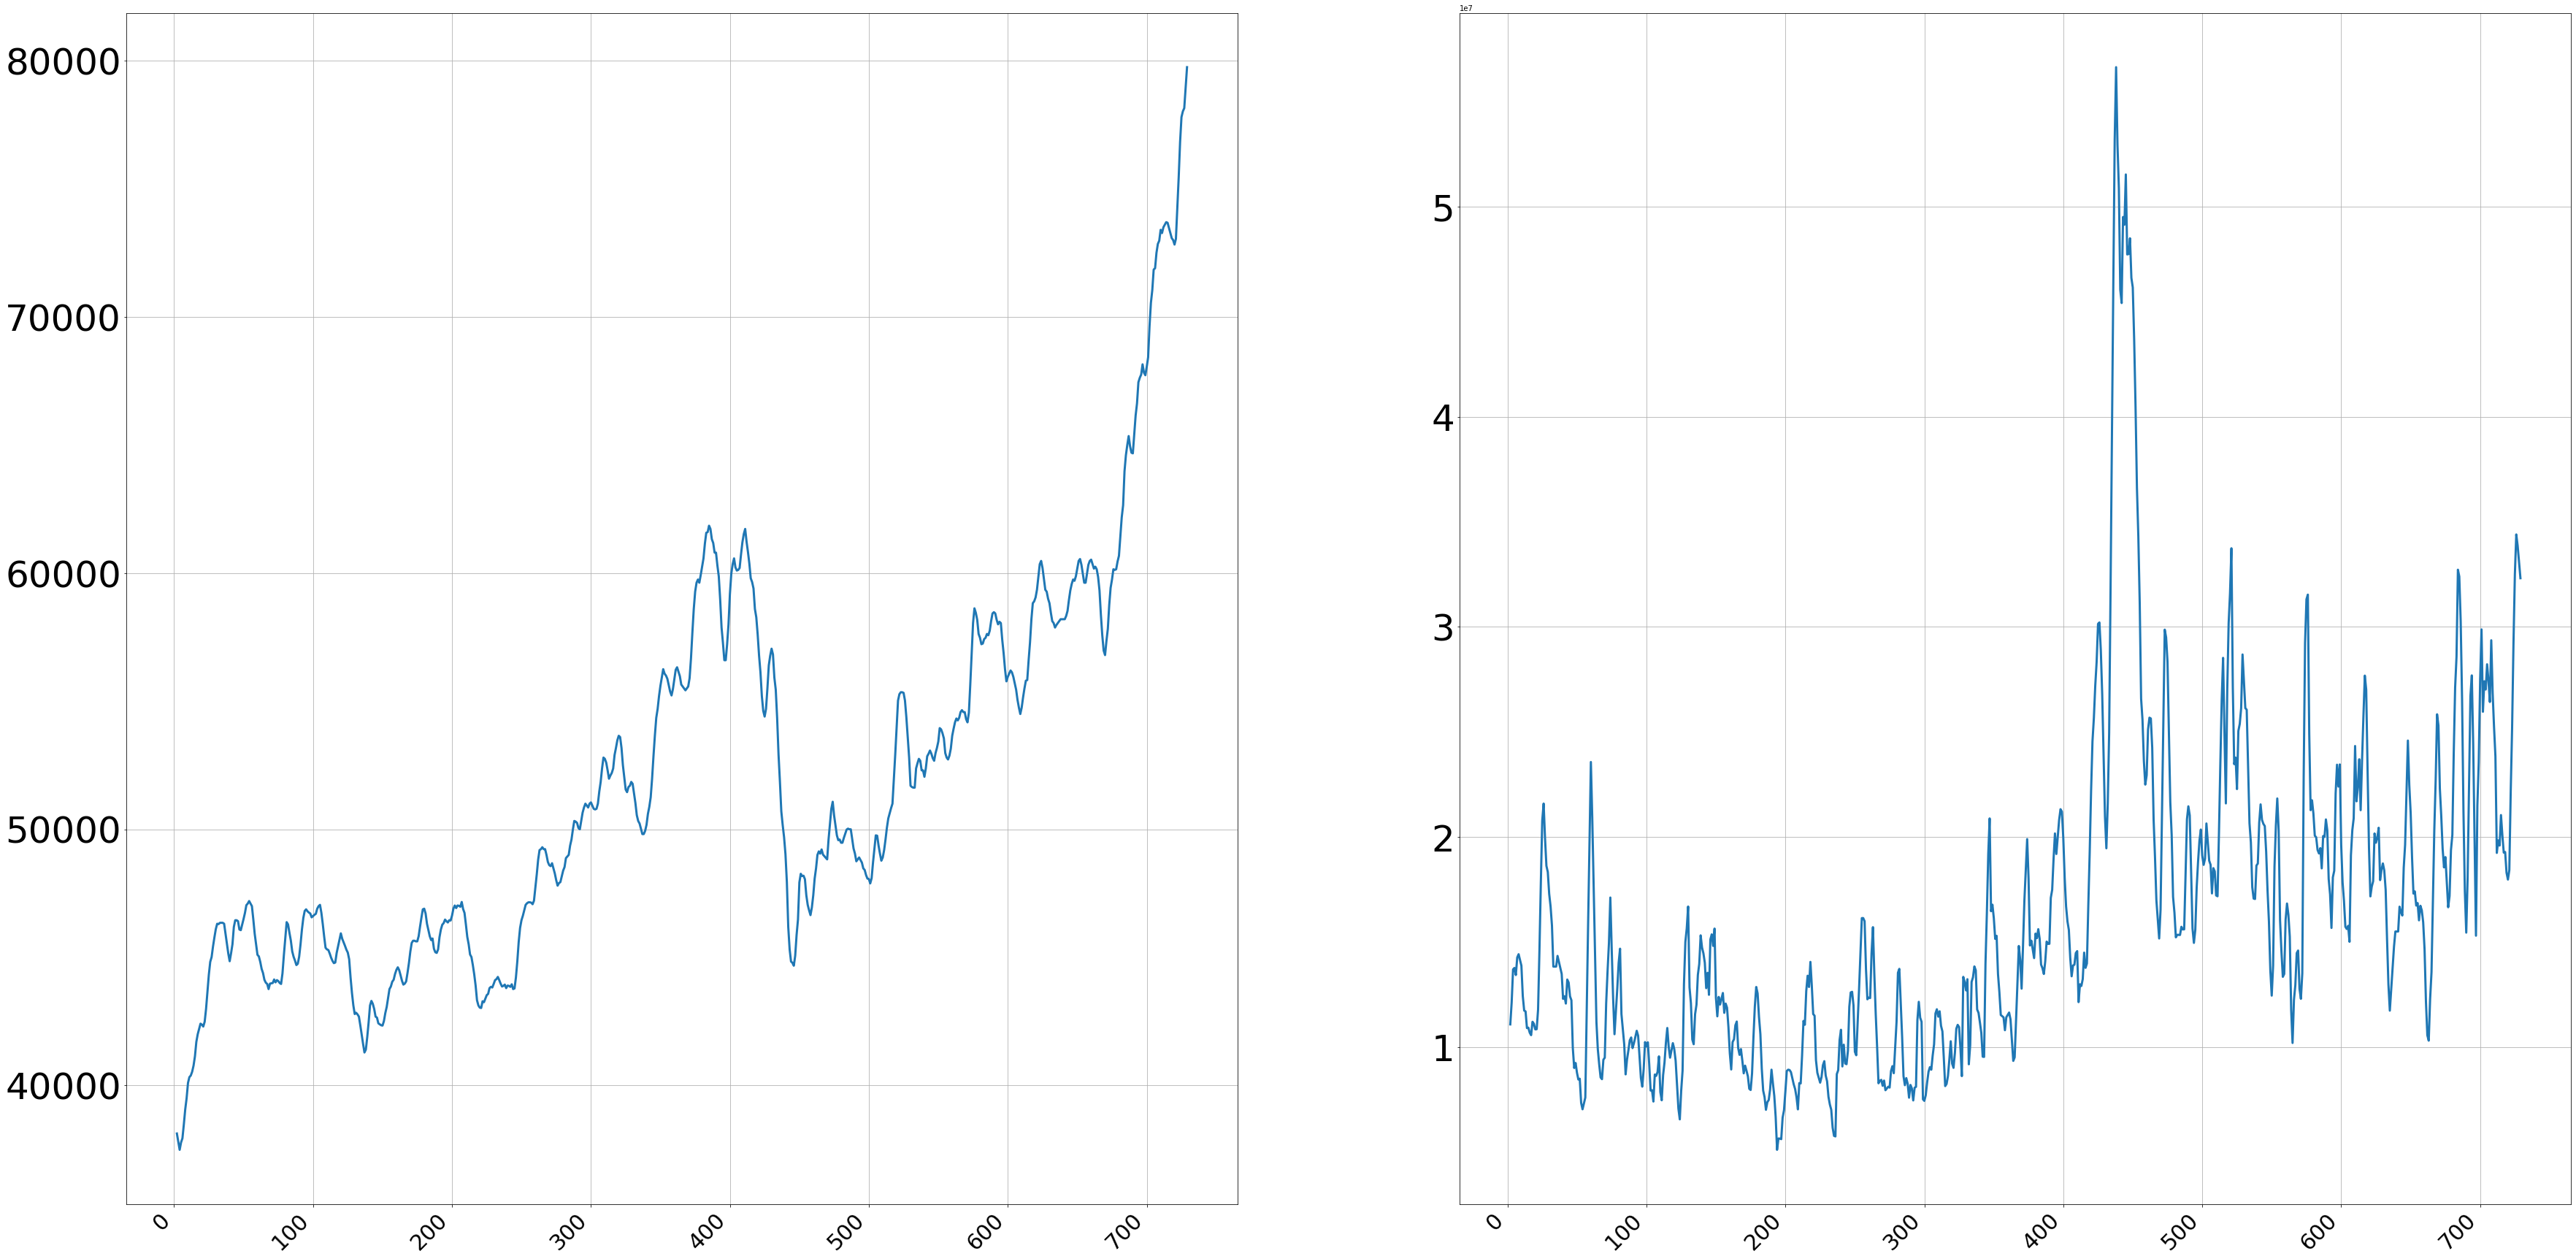

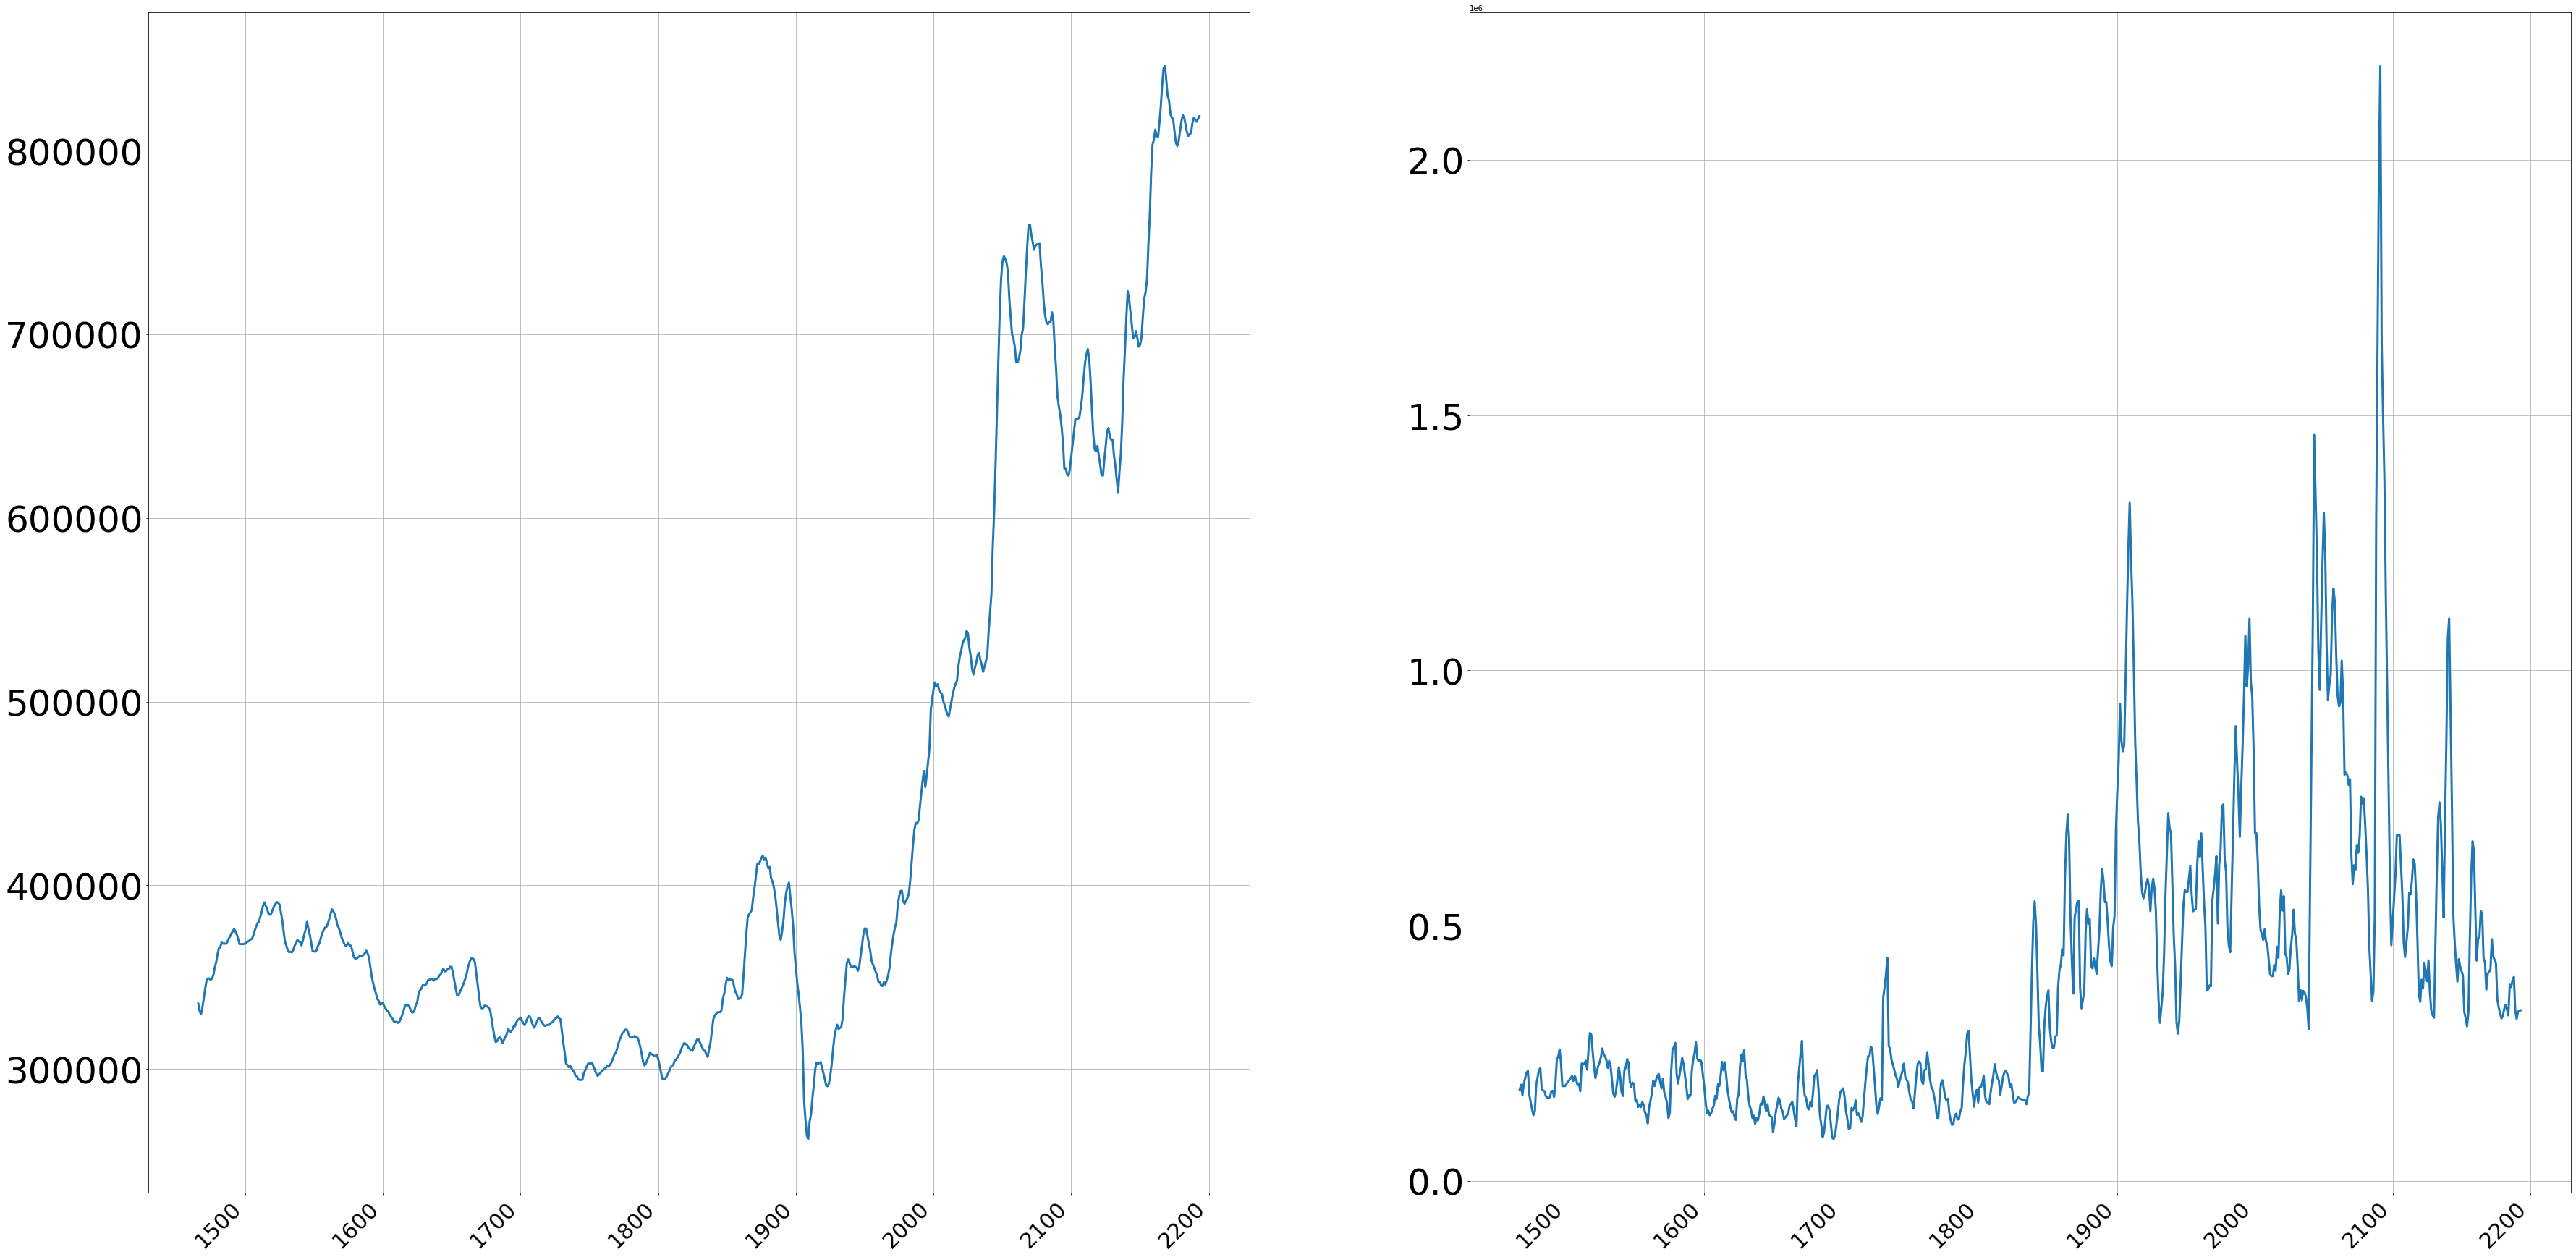

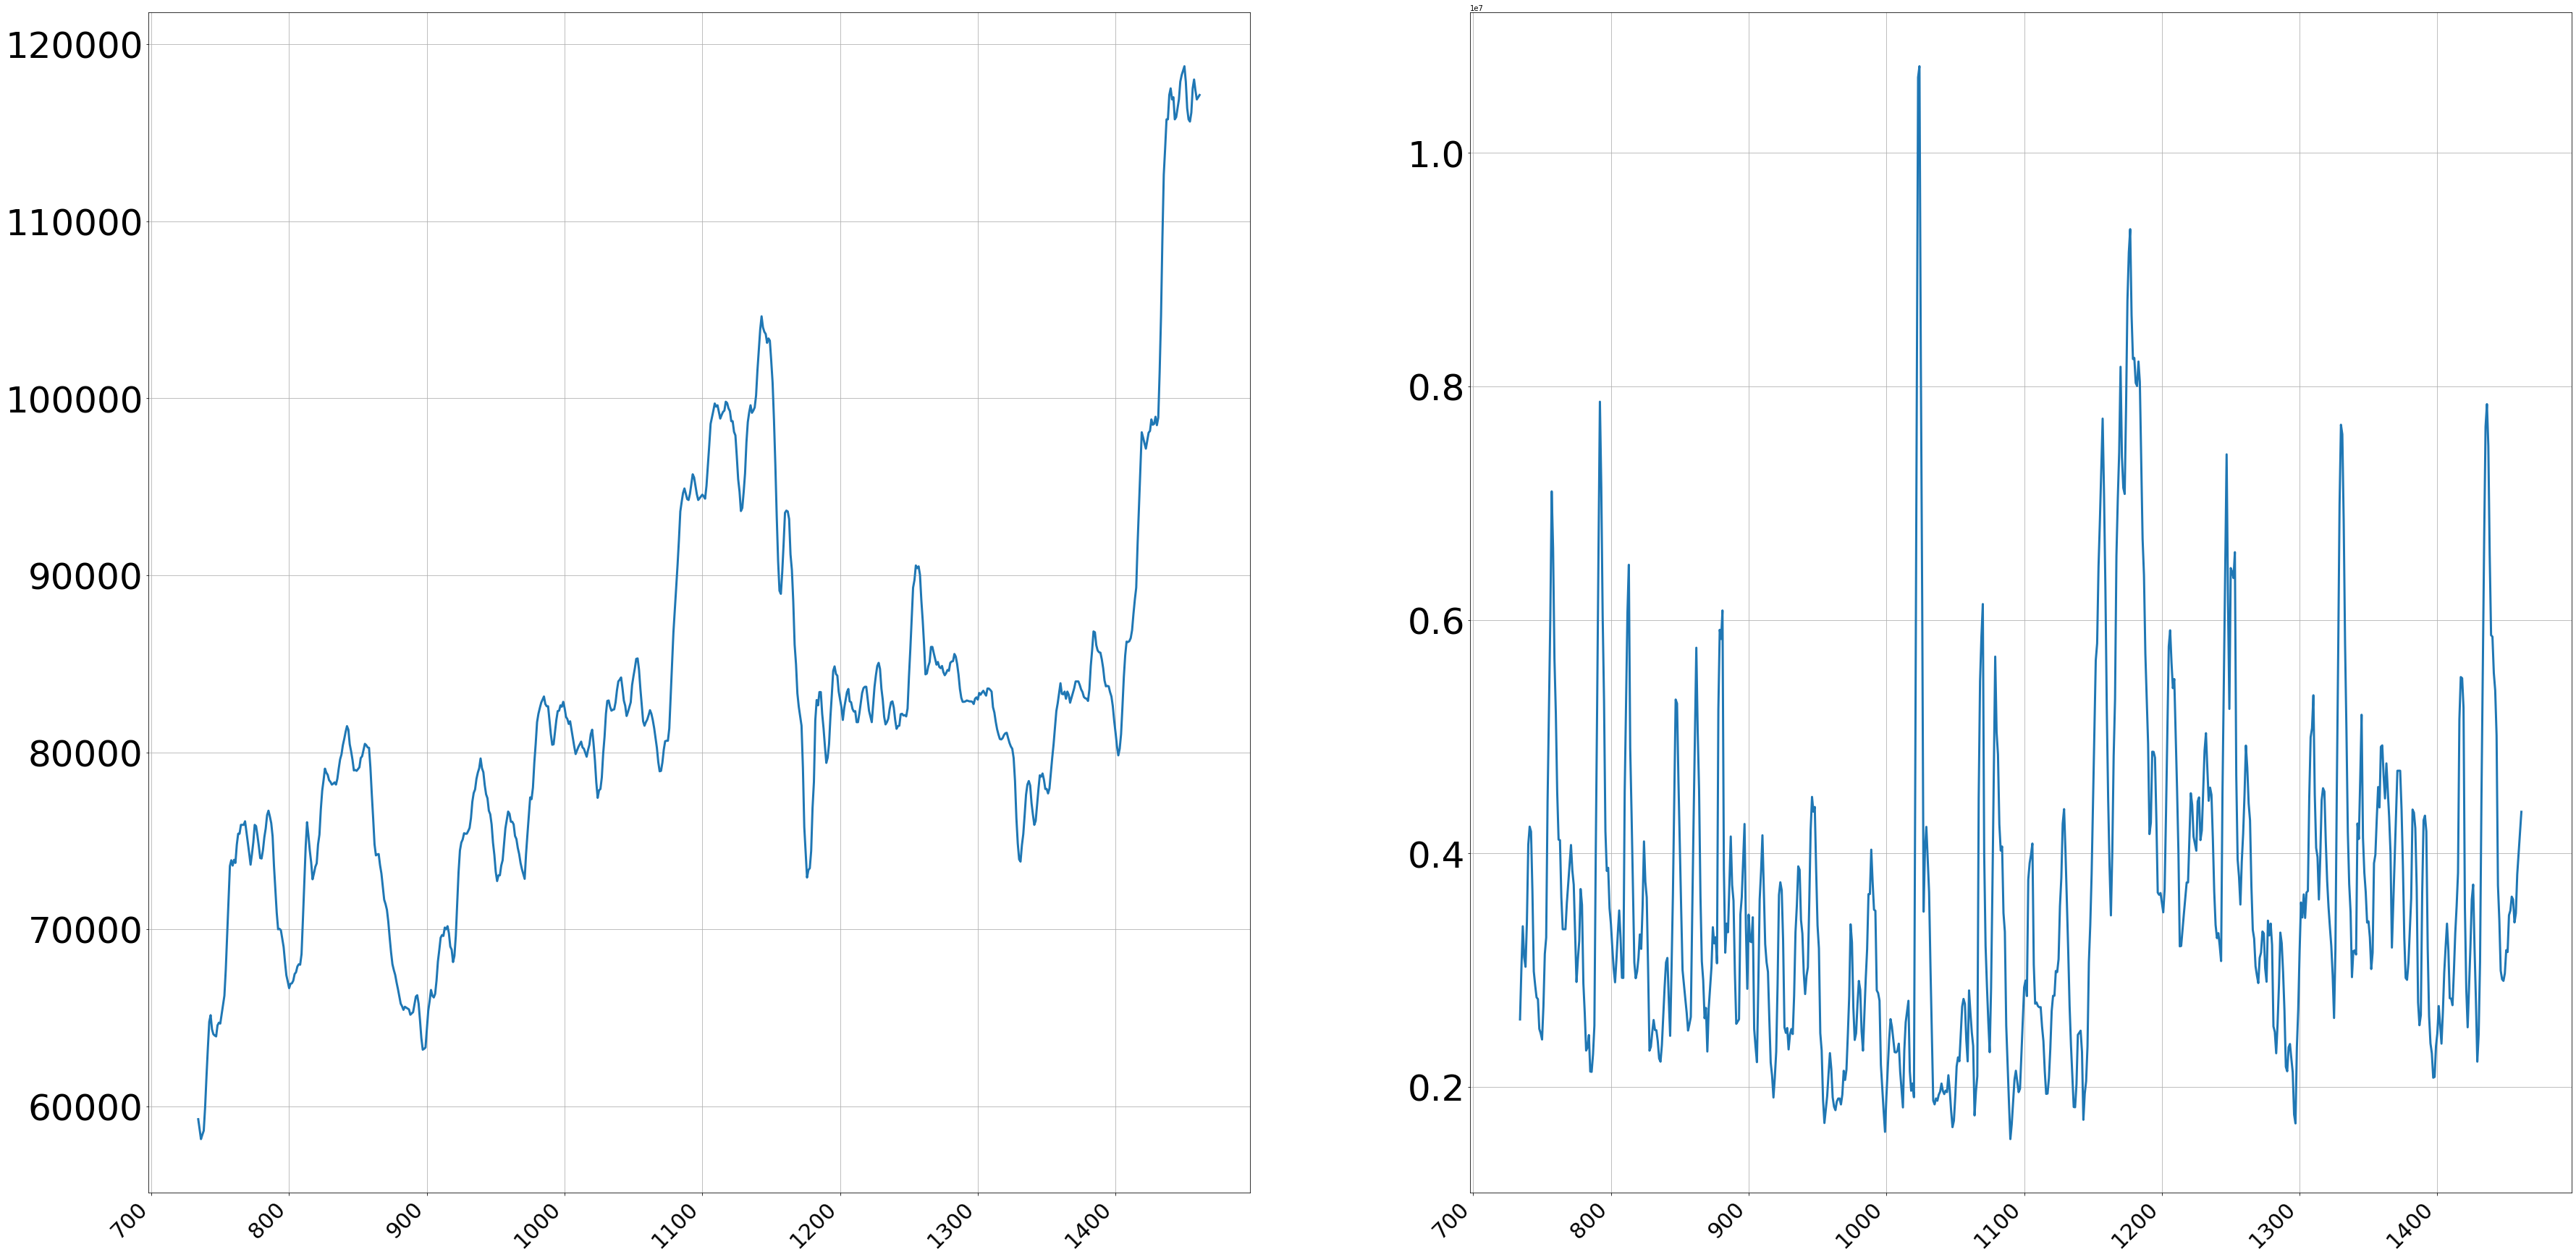

In [121]:
nma = 2
for i in company:
    count = 1
    plt.figure(figsize =(60,30))
    tmp = stock[stock["Code"]==i] # extract each company data
    price = [] # price list
    volume = [] # volume list
    for j in range(nma,len(tmp)-nma): # average every 5 data
        price.append(tmp["Price"].iloc[j-nma:j+nma].mean())
        volume.append(tmp["Volume"].iloc[j-nma:j+nma].mean())
    plt.subplot(1,2,count)
    count+=1
    
    mean5 = pd.DataFrame({"Time":tmp["Date"].index.values[nma:len(tmp)-nma],"Mean_Price":price}) # x is date y is price
    plt.plot(mean5["Time"],mean5["Mean_Price"],linewidth=3.0)  # draw graph
    #plt.plot(,price,linewidth=3.0)  # draw graph
    plt.yticks(fontsize=50)
    plt.xticks(fontsize=30,rotation=45,ha="right")
    plt.grid(True)
    
    plt.subplot(1,2,count)
    mean5 = pd.DataFrame({"Time":tmp["Date"].index.values[nma:len(tmp)-nma],"Mean_volume":volume}) # x is date y is volume
    plt.plot(mean5["Time"],mean5["Mean_volume"],linewidth=3.0)
    plt.yticks(fontsize=50)
    plt.xticks(fontsize=30,rotation=45,ha="right")
    plt.grid(True)